In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns

In [3]:
# Import csv files
data = Path("sources/Amazon Customer Behavior Survey.csv")
data_df = pd.read_csv(data)

data_df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


# Impact customer reviews and personalized recommendations have on shopping behaviours.

In [4]:
reviews_recs_df = data_df[['Customer_Reviews_Importance', 'Review_Reliability', 'Review_Helpfulness', 
                        'Personalized_Recommendation_Frequency', 'Recommendation_Helpfulness', 
                           'Purchase_Frequency', 'Purchase_Categories', 'Gender', 'age']]

reviews_recs_df.head(10)

,Customer_Reviews_Importance,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Purchase_Frequency,Purchase_Categories,Gender,age
0,1,Occasionally,Yes,Yes,Yes,Few times a month,Beauty and Personal Care,Female,23
1,1,Heavily,Yes,Yes,Sometimes,Once a month,Clothing and Fashion,Female,23
2,2,Occasionally,No,No,No,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,Prefer not to say,24
3,5,Heavily,Yes,Sometimes,Sometimes,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Female,24
4,1,Heavily,Yes,Yes,Yes,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Female,22
5,1,Heavily,Yes,No,No,Less than once a month,Clothing and Fashion,Female,21
6,1,Heavily,Yes,No,Sometimes,Less than once a month,Clothing and Fashion,Female,22
7,1,Heavily,Sometimes,No,Sometimes,Few times a month,Beauty and Personal Care;Clothing and Fashion,Female,21
8,1,Moderately,Yes,Sometimes,Yes,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Female,20
9,1,Heavily,Yes,No,Yes,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Female,23


Does the use of customer reviews and/or personalized recommendations have an impact on shopping behaviors of Amazon customers?

1. Can look at customer reviews and/or personalized recommendations compared with purchase frequency.
2. Can look at customer reviews and/or personalized recommendations compared with gender.
3. Can look at customer reviews and/or personalized recommendations compared with the category purchased most.
4. Can look at customer reviews and/or personalized recommendations percentages with all the above to put a value to it (think pie chart for %).



In [5]:
unique_purchase_frequency = data_df['Purchase_Frequency'].unique()
print("Unique values in Purchase_Frequency column:")
print(unique_purchase_frequency)

Unique values in Purchase_Frequency column:
['Few times a month' 'Once a month' 'Less than once a month'
 'Multiple times a week' 'Once a week']


In [6]:
unique_review_helpfulness = data_df['Review_Helpfulness'].unique()
print("Unique values in Review Helpfulness column:")
print(unique_review_helpfulness)

Unique values in Review Helpfulness column:
['Yes' 'No' 'Sometimes']


In [7]:
unique_recommendation_helpfulness = data_df['Recommendation_Helpfulness'].unique()
print("Unique values in Recommendation Helpfulness column:")
print(unique_recommendation_helpfulness)

Unique values in Recommendation Helpfulness column:
['Yes' 'Sometimes' 'No']


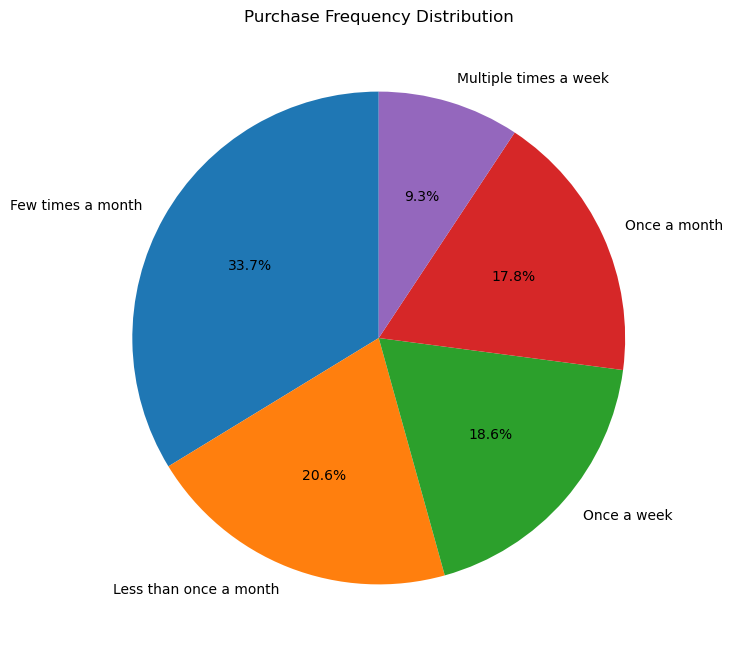

In [8]:
# pie chart

# group data by 'purchase frequency' and calculate counts
purchase_frequency_counts = data_df['Purchase_Frequency'].value_counts()

# create pie chart
plt.figure(figsize=(8,8))
plt.pie(purchase_frequency_counts, labels=purchase_frequency_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Purchase Frequency Distribution')

plt.show()

This pie chart of purchase frequency shows how often people are purchasing from Amazon. From this pie chart we can see that a few times a month is the largest area and multiple times a week is the smallest.

I wanted to start with this piece of information to get an idea of when people were purchasing to see if things shifted at all, or if we could even tell.

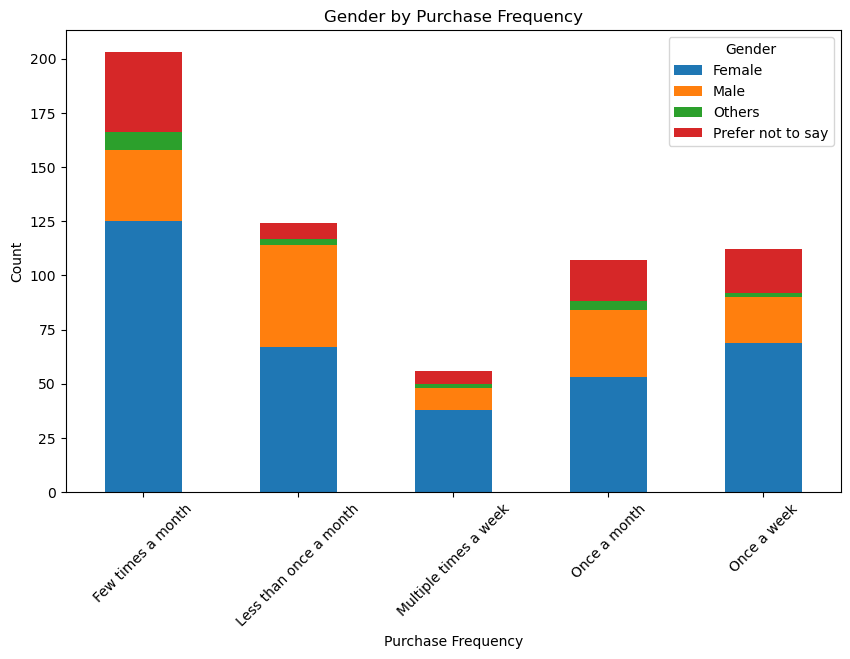

In [9]:
#Bar graphs showing relationships between purchase frequency, sale count, and gender

unique_grouped = data_df.groupby(['Purchase_Frequency', 'Gender']).size().unstack()
unique_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender by Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In this stacked bar graph we are looking at purchase frequency by gender, specifically how frequently they are purchasing on Amazon. Looking at this graph, we can see that females are purchasing more often across all levels here.

In [18]:
bins = [0, 10, 20, 30, 40, 50, 70]  # Customize these bins according to your age ranges
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-70']  # Labels for the age groups

# Create a new column 'Age_Group' with the age groups
data_df['Age_Group'] = pd.cut(data_df['age'], bins=bins, labels=labels, right=False)

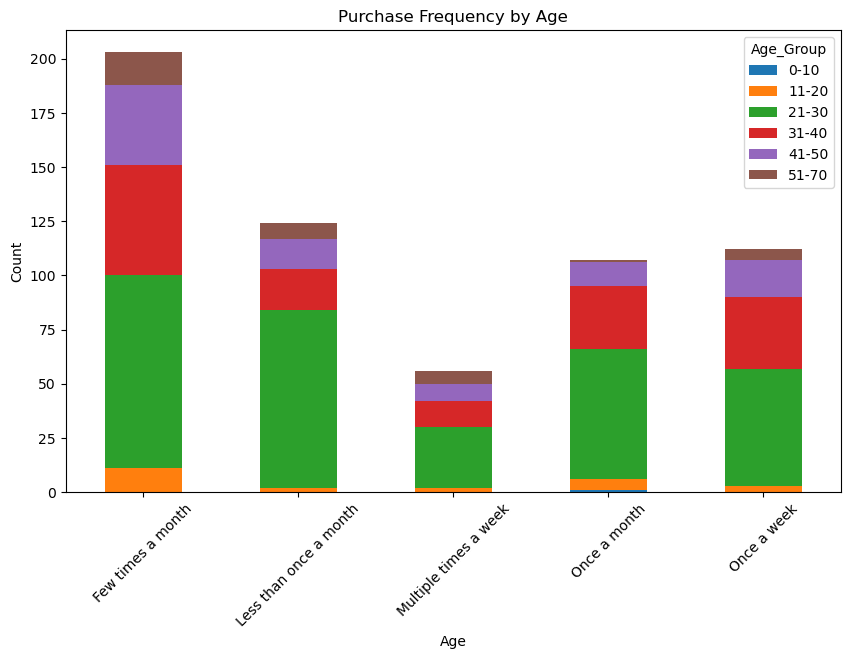

In [21]:
#Bar graphs showing relationships between purchase frequency, sale count, and age

unique_grouped = data_df.groupby(['Purchase_Frequency', 'Age_Group']).size().unstack()
unique_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Purchase Frequency by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



In this bar graph we are looking at purchase frequency and age. We can see that the age group of 21-30 is the group that purchases the most. 

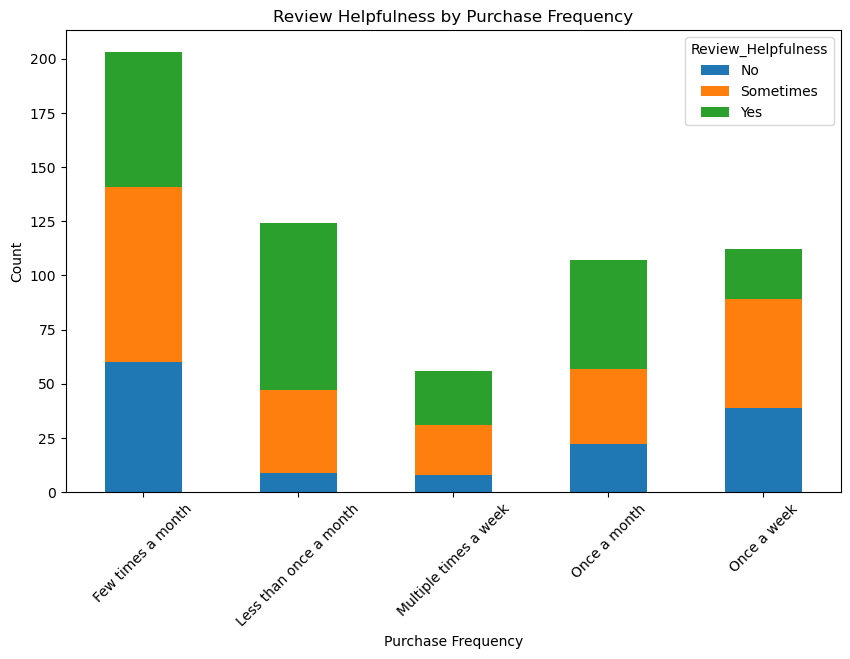

In [14]:
#Bar graphs showing relationships between purchase frequency, sale count, and 'Review_Helpfulness' and/or 'Recommendation_Helpfulness'

unique_grouped = data_df.groupby(['Purchase_Frequency', 'Review_Helpfulness']).size().unstack()
unique_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Review Helpfulness by Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In this stacked bar graph we are looking at purchase frequency and review helpfulness. I wanted to focus on the areas with reviews and recommendations to see if either of those had an impact on how customers shopped. 

Here customers were to rate how helpful the reviews of an item were to them when shopping for an item. Based on how often customers were shopping those reviews were helpful, sometimes helpful, or not helpful. Based on this graph, it appears that the reviews were always more helpful than not. But other than that, it depended on how often the customer was shopping if they found the reviews more helpful or sometimes helpful, but that means it was still helpful. For intance, if they are shopping less than once a month they are ranking the reviews very helpful over both other options. On the other hand, if they are shopping once a week, it appears that the not helpful and sometimes ranking are very similar and the very helpful is ranked lower.

But to determine the difference between the 'sometimes' and 'no' helpfulness we would need to look further.

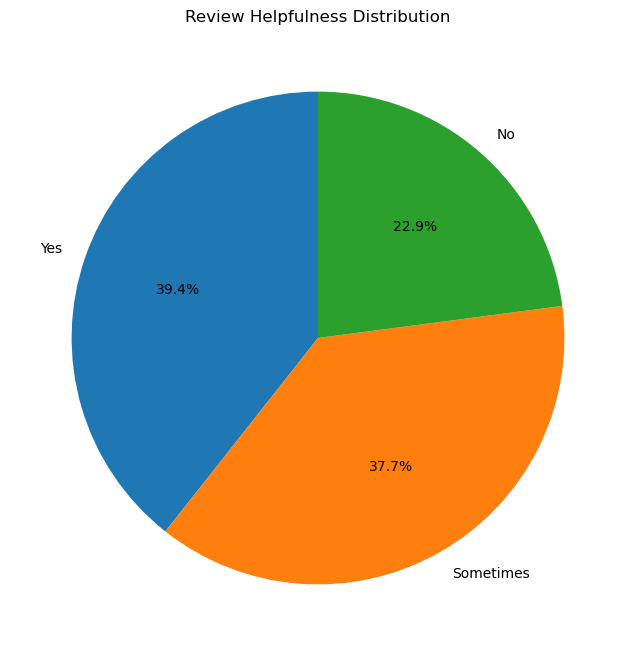

In [15]:
# pie chart

# group data by 'Review Helpfulness' and calculate counts
review_helpfulness_counts = data_df['Review_Helpfulness'].value_counts()

# create pie chart
plt.figure(figsize=(8,8))
plt.pie(review_helpfulness_counts, labels=review_helpfulness_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Review Helpfulness Distribution')

plt.show()

In this pie chart we are looking at the percentages of review helpfulness. And based on the stacked bar graph above, we know that the customers valued the reviews more than not having the reviews and that proves true here. The largest percentages are the 'yes' and 'sometimes' pieces, where 'no' is smaller than both others. 

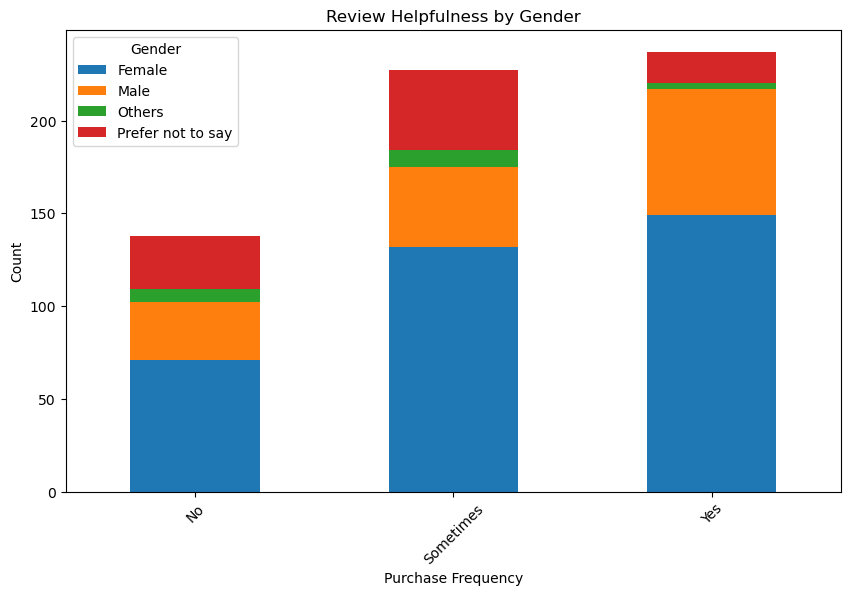

In [33]:
#Bar graphs showing relationships between purchase frequency, sale count, and gender

unique_grouped = data_df.groupby(['Review_Helpfulness', 'Gender']).size().unstack()
unique_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Review Helpfulness by Gender')
plt.xlabel('Purchase Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In this stacked bar graph we are looking at purchase frequency and review helpfulness related to gender. From this graph we can see that females are rating and using the reviews more than any other gender. Males looks to follow females in the use of reviews followed closely by 'prefer not to say' category.

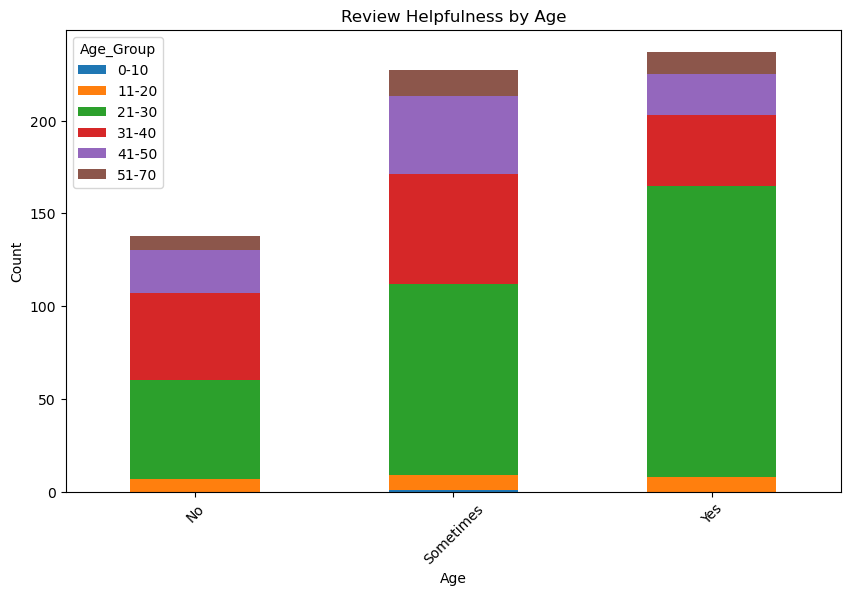

In [23]:
#Bar graphs showing relationships between purchase frequency, sale count, and age

unique_grouped = data_df.groupby(['Review_Helpfulness', 'Age_Group']).size().unstack()
unique_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Review Helpfulness by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In this bar graph we are looking at Review Helpfulness by Age. As we can see the 21-30 age group uses the reviews more than any other age group. 

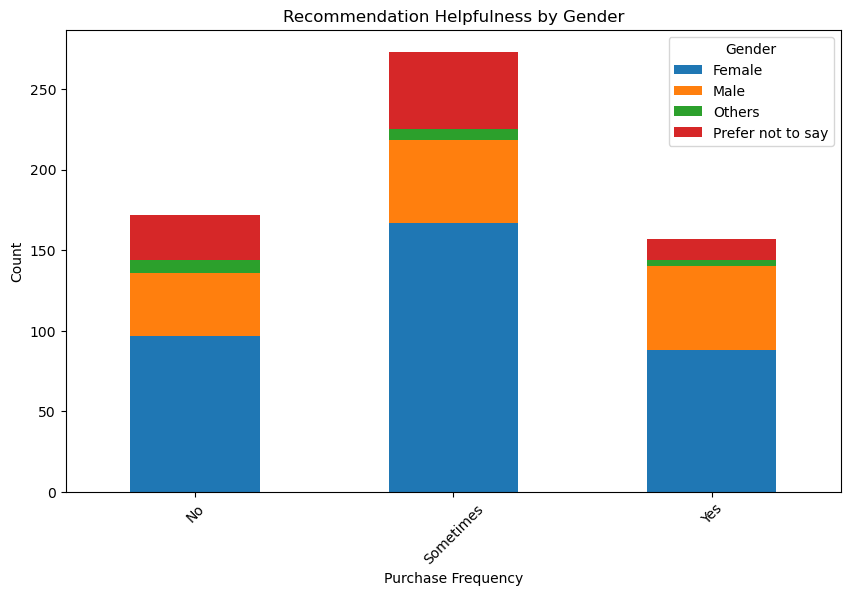

In [34]:
#Bar graphs showing relationships between purchase frequency, sale count, and gender

unique_grouped = data_df.groupby(['Recommendation_Helpfulness', 'Gender']).size().unstack()
unique_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Recommendation Helpfulness by Gender')
plt.xlabel('Purchase Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In this stacked bar graph we are looking at purchase frequency and the personalized recommendations from Amazon related to gender. And we can see the females again are rating and using the recommendations the most, but the 'yes' and 'no' categories are more closely ranked. 

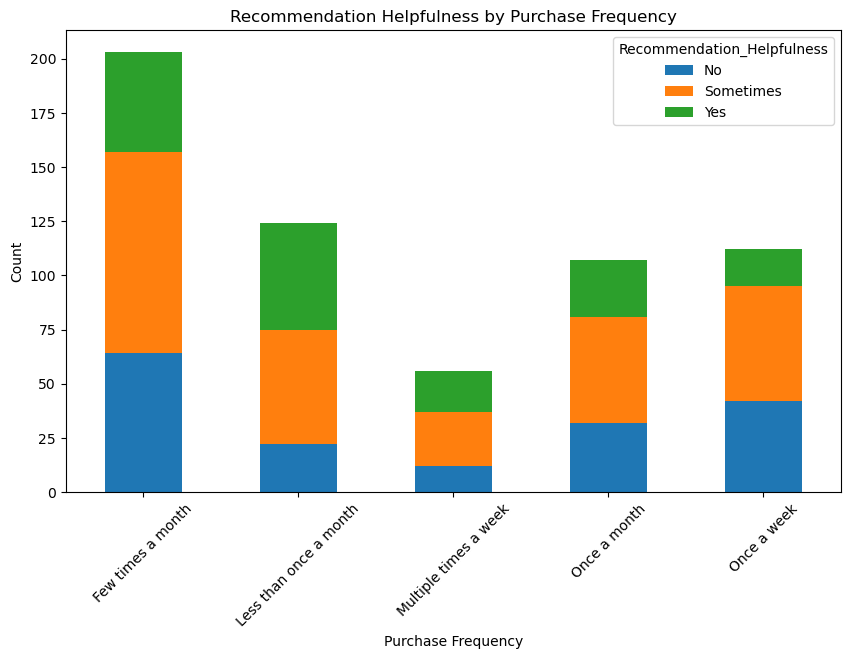

In [23]:
#Bar graphs showing relationships between purchase frequency, sale count, and 'Review_Helpfulness' and/or 'Recommendation_Helpfulness'

unique_grouped = data_df.groupby(['Purchase_Frequency', 'Recommendation_Helpfulness']).size().unstack()
unique_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Recommendation Helpfulness by Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In this stacked bar graph we are looking at purchase frequency and recommendation helpfulness. Specifically personalizied recommendations that Amazon gives while looking at particular items. I wanted to focus on the areas with reviews and recommendations to see if either of those had an impact on how customers shopped. 

Just like review helpfulness, customers were to rate how helpful the personalized recommendations of an item were to them when shopping. Based on how often customers were shopping those recommendations were helpful, sometimes helpful, or not helpful. Based on this graph, it appeaers that customers may have been more inclined to mark the recommendations helpful sometimes rather than a yes or no. It also looks like for a yes or no rating it may depend on how often customers are shopping. For instance, if they are shopping once a week, the recommendations are sometimes helpful but more not help than helpful to them. On the other hand, if they are shopping less than once a month, the rating of sometimes and yes seem to more closely ranked while the not helpful ranking is much lower.

But to determine the difference between the 'yes' and 'no' helpfulness we would need to look further.

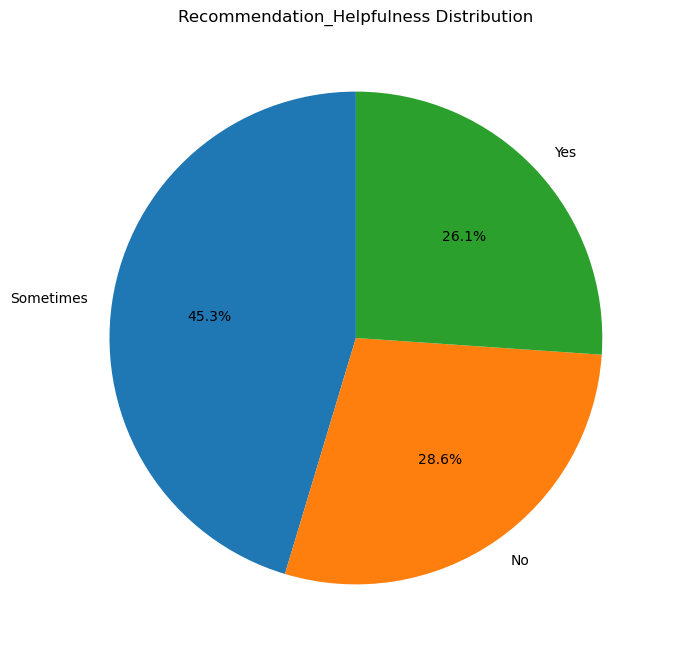

In [17]:
# pie chart

# group data by 'Recommendation_Helpfulness' and calculate counts
recommendation_helpfulness_counts = data_df['Recommendation_Helpfulness'].value_counts()

# create pie chart
plt.figure(figsize=(8,8))
plt.pie(recommendation_helpfulness_counts, labels=recommendation_helpfulness_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Recommendation_Helpfulness Distribution')

plt.show()

In this pie chart we are looking at the percentages of recommendation helpfulness. Specifically personalizied recommendations that Amazon gives while looking at particular items. Looking at the percentages of personalized recommendation helpfulness, we can see that customers did in fact rank the 'sometimes' rating most helpful followed by 'no' and 'yes' with perecentages very close to each other. But overall, customers are using the recommendations over not using them.

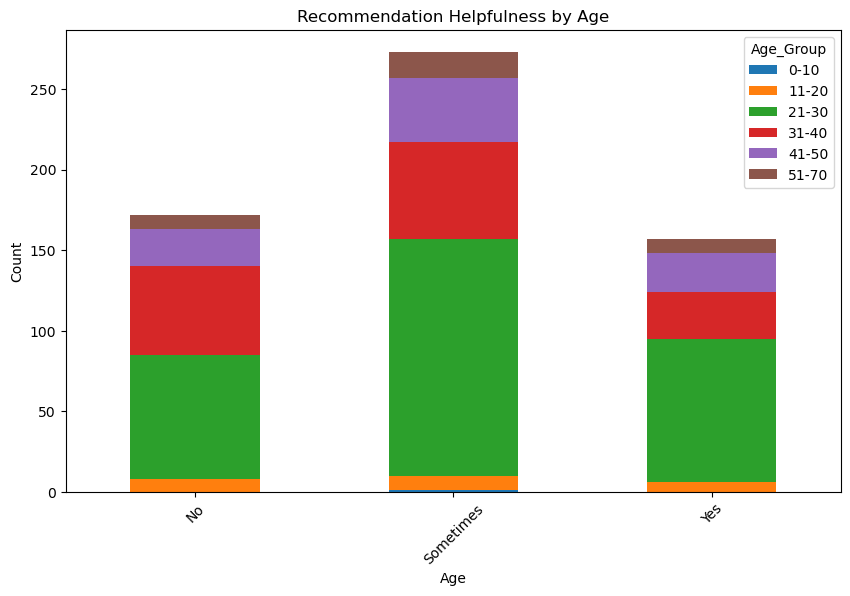

In [24]:
#Bar graphs showing relationships between purchase frequency, sale count, 'Recommendation_Helpfulness', age

unique_grouped = data_df.groupby(['Recommendation_Helpfulness', 'Age_Group']).size().unstack()
unique_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Recommendation Helpfulness by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In this bar graph we are looking at Recommendation Reviews by Age. As we can see the same age group, 21-30 are using the personalized recommendations more than any other age groups.

In [18]:
# split purchase_categories 
categories_split = reviews_recs_df['Purchase_Categories'].str.split(';', expand=True)
categories_split.head()

,0,1,2,3,4
0,Beauty and Personal Care,None,None,None,None
1,Clothing and Fashion,None,None,None,None
2,Groceries and Gourmet Food,Clothing and Fashion,None,None,None
3,Beauty and Personal Care,Clothing and Fashion,others,None,None
4,Beauty and Personal Care,Clothing and Fashion,None,None,None


<Figure size 1000x600 with 0 Axes>

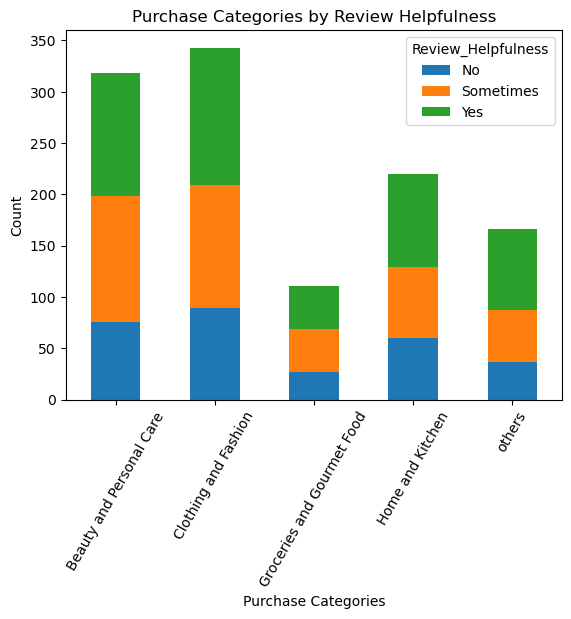

In [19]:
stacked_categories = pd.concat([categories_split, reviews_recs_df['Review_Helpfulness']], axis=1)
stacked_categories = stacked_categories.melt(id_vars='Review_Helpfulness').dropna()

# create stack bar graph showing purchase peer category vs review helpfulness
plt.figure(figsize=(10,6))
category_plot = stacked_categories.groupby(['value','Review_Helpfulness']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Purchase Categories by Review Helpfulness')
plt.xlabel('Purchase Categories')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.legend(title='Review_Helpfulness')
plt.show()

In this stacked bar graph we are looking at review helpfulness per purchase category. I had to separate the purchase category column into unique purchase categories to be able to see this more clearly. From this graph we can see that beauty/personal care and clothing/fashion categories are purchased the most and groceries/gourmet food items are purchased least. But with that information in the categories that have the most purchases, it looks like the reviews are rated pretty similar across the board. But if you look at home/kitchen and other categories the helpfulness of the reviews are most different. 
To determine percentages further analysis is needed, but upon first glances it appears that customers are using the reviews wether it is a yes or sometimes over not at all.

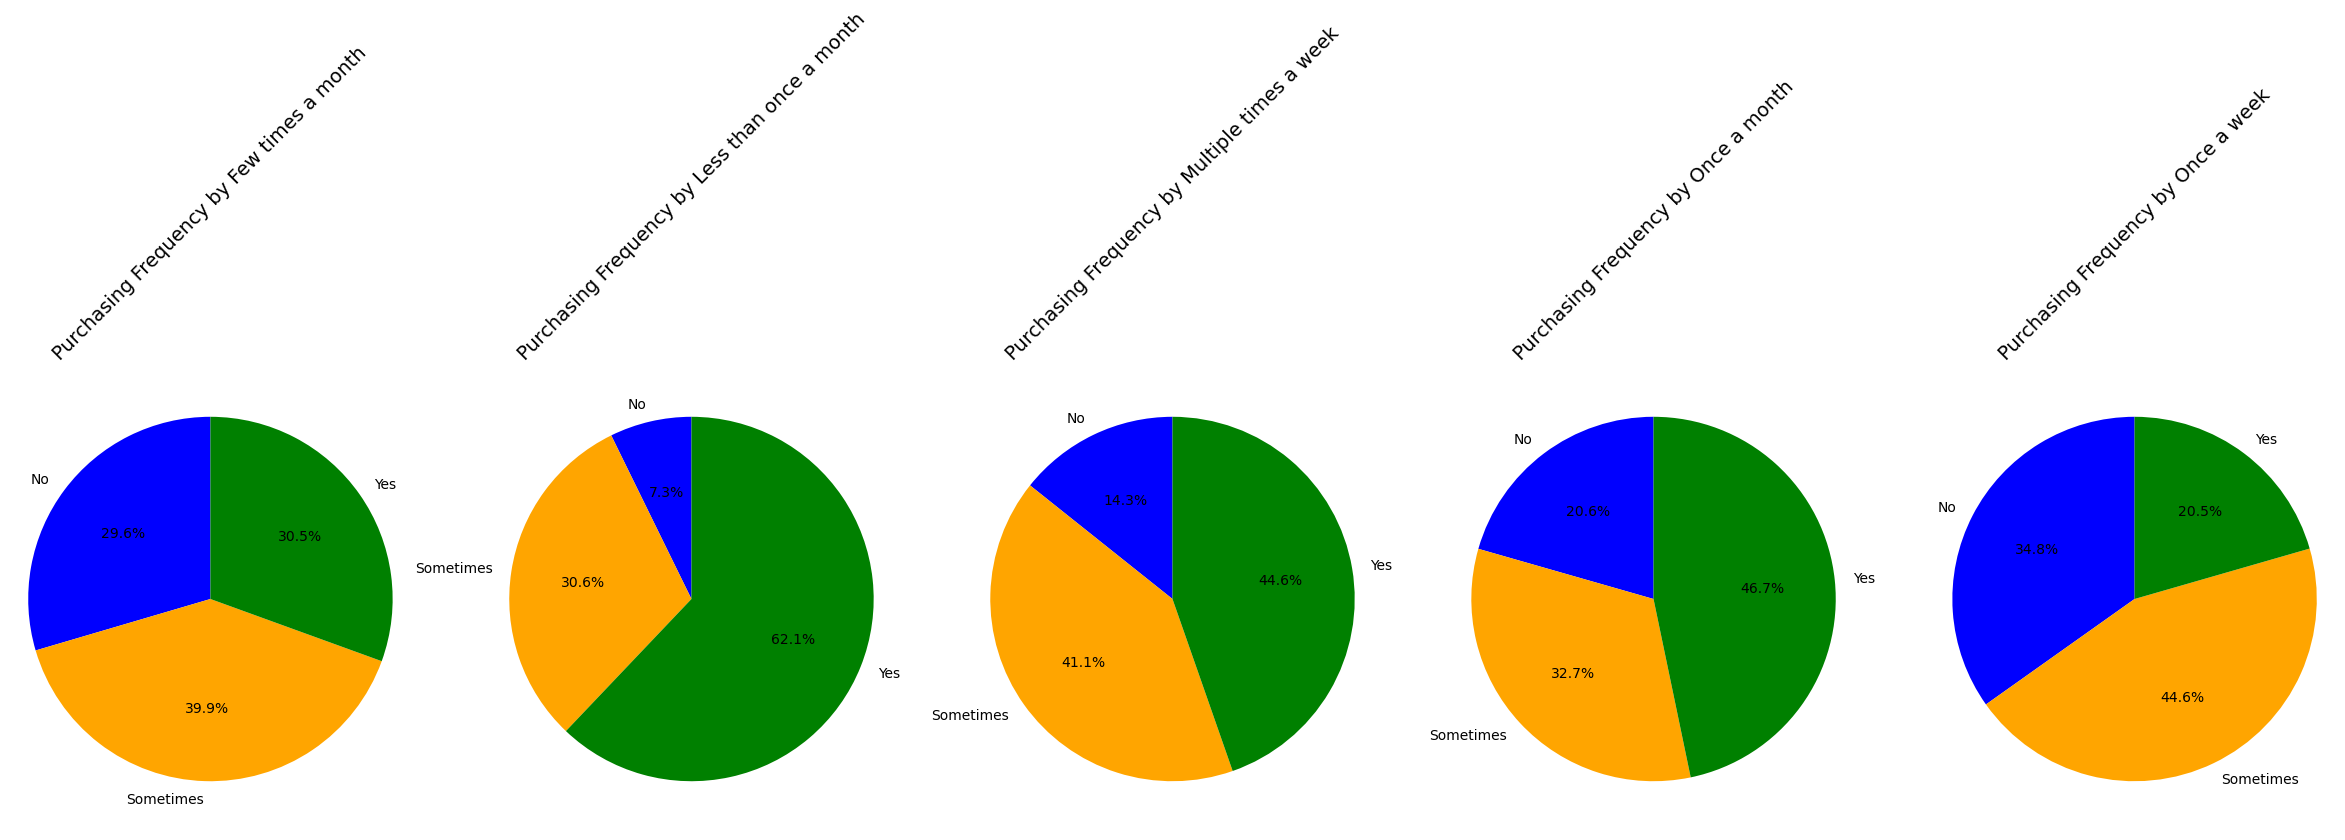

In [35]:
# Filter the data for the purchasing categories
data_filtered = data_df[data_df['Purchase_Frequency'].isin(unique_purchase_frequency)]

purchase_by_review_helpfulness = data_filtered.groupby(['Purchase_Frequency', 'Review_Helpfulness']).size().unstack()

# Define colors for the pie chart
colors = ['blue', 'orange', 'green']

# Plot the purchasing frequency categories by gender in a pie chart
fig, axs = plt.subplots(1, len(purchase_by_review_helpfulness), figsize=(30, 6))

for i, (review_helpfulness, row) in enumerate(purchase_by_review_helpfulness.iterrows()):
    axs[i].pie(row, labels=row.index, autopct='%1.1f%%', startangle=90, colors=colors)
    axs[i].set_title(f'Purchasing Frequency by {review_helpfulness}', fontsize=14, rotation = 45)
    axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

In these pie charts I wanted to see purchase frequency compared with review helpfulness. By putting this in a pie chart we are able to see percentages and see a numerical value to this. It looks like across the board the reviews are being used opposed to not being used. Where the reviews are being used most looks might depend on how often customers are shopping, but in the less than once a month and multiple times a week categories is where the 'no' category is the smallest. But again, the reviews are being used.

<Figure size 1000x600 with 0 Axes>

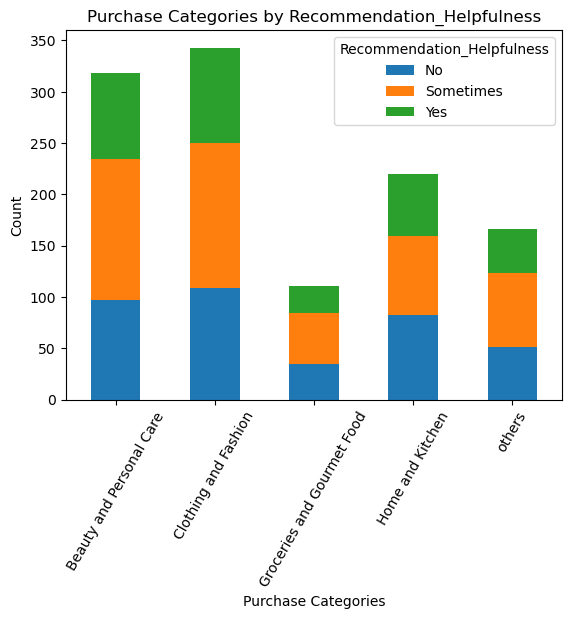

In [36]:
stacked_categories = pd.concat([categories_split, reviews_recs_df['Recommendation_Helpfulness']], axis=1)
stacked_categories = stacked_categories.melt(id_vars='Recommendation_Helpfulness').dropna()

# create stack bar graph showing purchase peer category vs review helpfulness
plt.figure(figsize=(10,6))
category_plot = stacked_categories.groupby(['value','Recommendation_Helpfulness']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Purchase Categories by Recommendation_Helpfulness')
plt.xlabel('Purchase Categories')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.legend(title='Recommendation_Helpfulness')
plt.show()

In this stacked bar graph we are looking at recommendation helpfulness per purchase category, again recommendations are personalized from Amazon per customer while shopping. I had to separate the purchase category column into unique purchase categories to be able to see this more clearly. From this graph we can see that beauty/personal care and clothing/fashion categories are purchased the most and groceries/gourmet food items are purchased least. But with that information in the categories that have the most purchases, it looks like the reviews are rated pretty similar across the board. But if you look at home/kitchen and other categories the helpfulness of the recommendations are most different. 
To determine percentages further analysis is needed, but upon first glances it appears that customers are using the recommendations wether it is a yes or sometimes over not at all. 

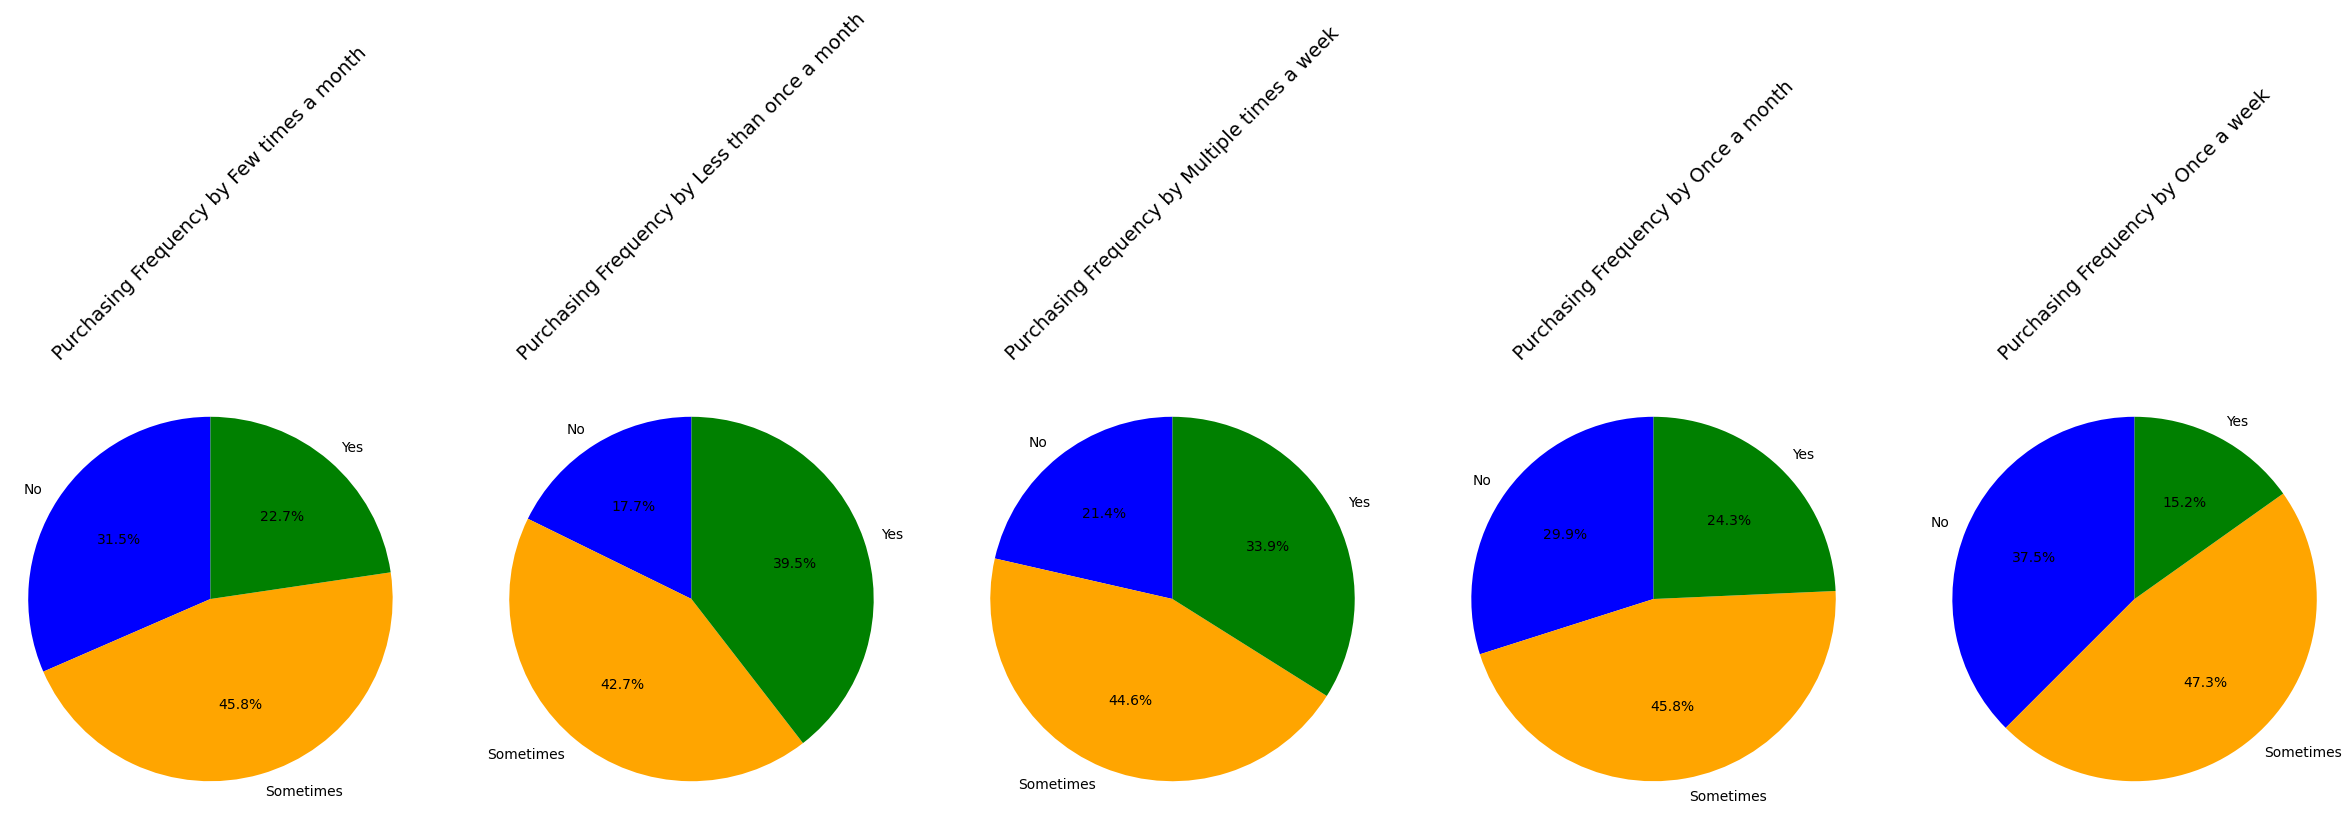

In [37]:
# Filter the data for the purchasing categories
data_filtered = data_df[data_df['Purchase_Frequency'].isin(unique_purchase_frequency)]

purchase_by_recommendation_helpfulness = data_filtered.groupby(['Purchase_Frequency', 'Recommendation_Helpfulness']).size().unstack()

# Define colors for the pie chart 
colors = ['blue', 'orange', 'green']

# Plot the purchasing frequency categories by gender in a pie chart
fig, axs = plt.subplots(1, len(purchase_by_recommendation_helpfulness), figsize=(30, 6))

for i, (recommendation_helpfulness, row) in enumerate(purchase_by_recommendation_helpfulness.iterrows()):
    axs[i].pie(row, labels=row.index, autopct='%1.1f%%', startangle=90, colors=colors)
    axs[i].set_title(f'Purchasing Frequency by {recommendation_helpfulness}', fontsize=14, rotation = 45)
    axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

In these pie charts I wanted to see purchase frequency compared with recommendation helpfulness. And by recommendation we mean personalizied recommendations given by Amazon. By putting this in a pie chart we are able to see percentages and see a numerical value to this. From what we can see like above, the recommendations are being used than not being used at all. In categories like less than once a month and multiple times a week, the 'no' category is the smallest again. But in few times a month and once a week, the 'no' categorrgy is slightly larger than the 'yes' category. But again, overall the recommendations are being used. 

Statistical Analysis for Purchase Frequency, Review Helpfulness, and Recommendation Helpfulness

In [38]:
contingency_table = pd.crosstab(data_df['Review_Helpfulness'], data_df['Purchase_Frequency'])
###### we have to tell it the categories of ....
# Performing the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the test statistics and p-value
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 62.62137410867137
P-value: 1.4226582864115184e-10


In [39]:
contingency_table = pd.crosstab(data_df['Recommendation_Helpfulness'], data_df['Purchase_Frequency'])
###### we have to tell it the categories of ....
# Performing the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the test statistics and p-value
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 26.255134439829348
P-value: 0.0009497374294010239


Statistical Analysis Results: 

Review Helpfulness: p-value of 1.422658e-10 is < 0.05; would reject the Ho.
Recommendation Helpfulness: p-value of 0.000949737 is < 0.05; would reject the Ho.

Hypothesis for project as a whole:

Ho: 
Ha: 

trish_reviews_recs analysis: Why you should care about the reviews and recommendations: 

When analyzing the data it was important to look at the reviews and perersonalized recommendations to know if customers were using them or finding them useful. Essentially, would it be worth it to keep product reviews and personalized recommendations. The data tells us that if you just look at yes and no responses from the customers we may not have a clear cut answer (from this data set, further analysis would be needed), but if you take the sometimes answer and group that with yes because they are using the reviews and recommendations. Then there is an overwhelming response to customers not only using the reviews and personalized recommendations but finding them more useful than not using them at all.

As well overall use of the reviews and recommendations, we found that females are not only shopping more but rating and using these reviews and personalized recommendations more than males, others, and the prefer not to say category for gender. This was also dominated by females as was there increase in shopping. As far as age ranges, the ages that are using the reviews and personalized recommendations the most is 21-30, followed by 31-40 year olds.